In [359]:

from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
plt.style.use('seaborn')

import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

# Imports
import time
import datetime


import scipy.stats as sp

import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

In [360]:
resultsDF = pd.read_csv('results.csv')
driversDF = pd.read_csv('drivers.csv')
driver_standingsDF = pd.read_csv('driver_standings.csv')
racesDF = pd.read_csv('races.csv')
constructorDF = pd.read_csv('constructors.csv')
pit_stopsDF = pd.read_csv(r'pit_stops.csv')
circuitsDF = pd.read_csv(r'circuits.csv')
weatherdf = pd.read_csv(r'/Users/cameronstevens/Documents/lighthouse-course/F1_worldchampionship_1950-2021/Formula1/CSV/weather.csv')

In [361]:
results = pd.read_csv(r'results.csv')
races = pd.read_csv(r'races.csv')
quali = pd.read_csv(r'qualifying.csv')
drivers = pd.read_csv(r'drivers.csv')
constructors = pd.read_csv(r'constructors.csv')
circuit = pd.read_csv(r'circuits.csv')
pit_stops = pd.read_csv(r'pit_stops.csv')
weather = pd.read_csv(r'/Users/cameronstevens/Documents/lighthouse-course/F1_worldchampionship_1950-2021/Formula1/CSV/weather.csv')
driver_standingsDF = pd.read_csv('driver_standings.csv')


In [362]:

weather.rename(columns={'season':'year'},inplace=True)
weather = weather.drop(['Unnamed: 0'],axis=1)
weather

,year,race_name,weather
0,2014,australian,dry
1,2014,malaysian,dry
2,2015,malaysian,33°c dry
3,2015,chinese,dry 21°c
4,2015,bahrain,dry 25°c
...,...,...,...
120,2021,emilia-romagna,wet 9.45°c
121,2021,portuguese,dry 19.5°c
122,2021,spanish,dry 21.4°c
123,2021,monaco,dry 21°c


In [363]:
df1 = pd.merge(races,results,how='inner',on=['raceId'])
df2 = pd.merge(df1,quali,how='inner',on=['raceId','driverId','constructorId'])
df3 = pd.merge(df2,drivers,how='inner',on=['driverId'])
df4 = pd.merge(df3,constructors,how='inner',on=['constructorId'])
df5 = pd.merge(df4,circuit,how='inner',on=['circuitId'])
df6 = pd.merge(df5,weather, how='outer',on=['year'])

#drop the columns which are not important
data = df6.drop(['round','circuitId','time_x','url_x','resultId','driverId',
                 'constructorId','number_x','positionText','position_x',
                 'positionOrder','laps','time_y','rank',
                 'fastestLapTime','fastestLapSpeed','qualifyId','driverRef','number','code','url_y','circuitRef',
                 'location','lat','lng','alt','number_y','constructorRef','name_x','raceId','fastestLap','q2','q3','milliseconds','q1'],1)

In [364]:
data.columns

Index(['year', 'date', 'grid', 'points', 'statusId', 'position_y', 'forename',
       'surname', 'dob', 'nationality_x', 'name_y', 'nationality_y', 'name',
       'country', 'race_name', 'weather'],
      dtype='object')

In [365]:
#considering data points from 2014
data = data[data['year']>=2014]
data.sort_values(by=['year'])


,year,date,grid,points,statusId,position_y,forename,surname,dob,nationality_x,name_y,nationality_y,name,country,race_name,weather
39576,2014,2014-06-22,12,0.0,10,13,Sebastian,Vettel,1987-07-03,German,Red Bull,Austrian,Red Bull Ring,Austria,australian,dry
39347,2014,2014-11-09,5,12.0,1,5,Jenson,Button,1980-01-19,British,McLaren,British,Autódromo José Carlos Pace,Brazil,malaysian,dry
39348,2014,2014-11-09,7,2.0,1,7,Kevin,Magnussen,1992-10-05,Danish,McLaren,British,Autódromo José Carlos Pace,Brazil,australian,dry
39349,2014,2014-11-09,7,2.0,1,7,Kevin,Magnussen,1992-10-05,Danish,McLaren,British,Autódromo José Carlos Pace,Brazil,malaysian,dry
39350,2014,2014-11-09,8,8.0,1,8,Fernando,Alonso,1981-07-29,Spanish,Ferrari,Italian,Autódromo José Carlos Pace,Brazil,australian,dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53768,2021,2021-09-12,12,1.0,1,14,Esteban,Ocon,1996-09-17,French,Alpine F1 Team,French,Autodromo Nazionale di Monza,Italy,bahrain,dry 20.5°c
53769,2021,2021-09-12,12,1.0,1,14,Esteban,Ocon,1996-09-17,French,Alpine F1 Team,French,Autodromo Nazionale di Monza,Italy,emilia-romagna,wet 9.45°c
53770,2021,2021-09-12,12,1.0,1,14,Esteban,Ocon,1996-09-17,French,Alpine F1 Team,French,Autodromo Nazionale di Monza,Italy,portuguese,dry 19.5°c
53772,2021,2021-09-12,12,1.0,1,14,Esteban,Ocon,1996-09-17,French,Alpine F1 Team,French,Autodromo Nazionale di Monza,Italy,monaco,dry 21°c


In [366]:
#rename the columns
data.rename(columns={'name':'GP_name','position_y':'position','grid':'quali_pos','name_y':'constructor','nationality_x':'driver_nationality','nationality_y':'constructor_nationality'},inplace=True)
data['driver'] = data['forename']+' '+data['surname']
data['date'] = pd.to_datetime(data['date'])
data['dob'] = pd.to_datetime(data['dob'])

In [367]:
#creating a driver age parameter
data['age_at_gp_in_days'] = abs(data['dob']-data['date'])
data['age_at_gp_in_days'] = data['age_at_gp_in_days'].apply(lambda x: str(x).split(' ')[0])

In [368]:
#Some of the constructors changed their name over the year so replacing old names with current name
data['constructor'] = data['constructor'].apply(lambda x: 'Racing Point' if x=='Force India' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Renault' if x=='Lotus F1' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'AlphaTauri' if x=='Toro Rosso' else x)

In [369]:
data['driver_nationality'] = data['driver_nationality'].apply(lambda x: str(x)[:3])
data['constructor_nationality'] = data['constructor_nationality'].apply(lambda x: str(x)[:3])
data['country'] = data['country'].apply(lambda x: 'Bri' if x=='UK' else x)
data['country'] = data['country'].apply(lambda x: 'Ame' if x=='USA' else x)
data['country'] = data['country'].apply(lambda x: 'Fre' if x=='Fra' else x)
data['country'] = data['country'].apply(lambda x: str(x)[:3])
data['driver_home'] = data['driver_nationality'] == data['country']
data['constructor_home'] = data['constructor_nationality'] == data['country']
data['driver_home'] = data['driver_home'].apply(lambda x: int(x))
data['constructor_home'] = data['constructor_home'].apply(lambda x: int(x))

In [370]:
#reasons for DNF(did not finish)
data['driver_dnf'] = data['statusId'].apply(lambda x: 1 if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] else 0)
data['constructor_dnf'] = data['statusId'].apply(lambda x: 1 if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1] else 0)
data.drop(['forename','surname'],1,inplace=True)

In [371]:
#font = {
   # 'family':'serif',
  #  'color':'black',
  #  'weight':'bold',
  #  'size':10}

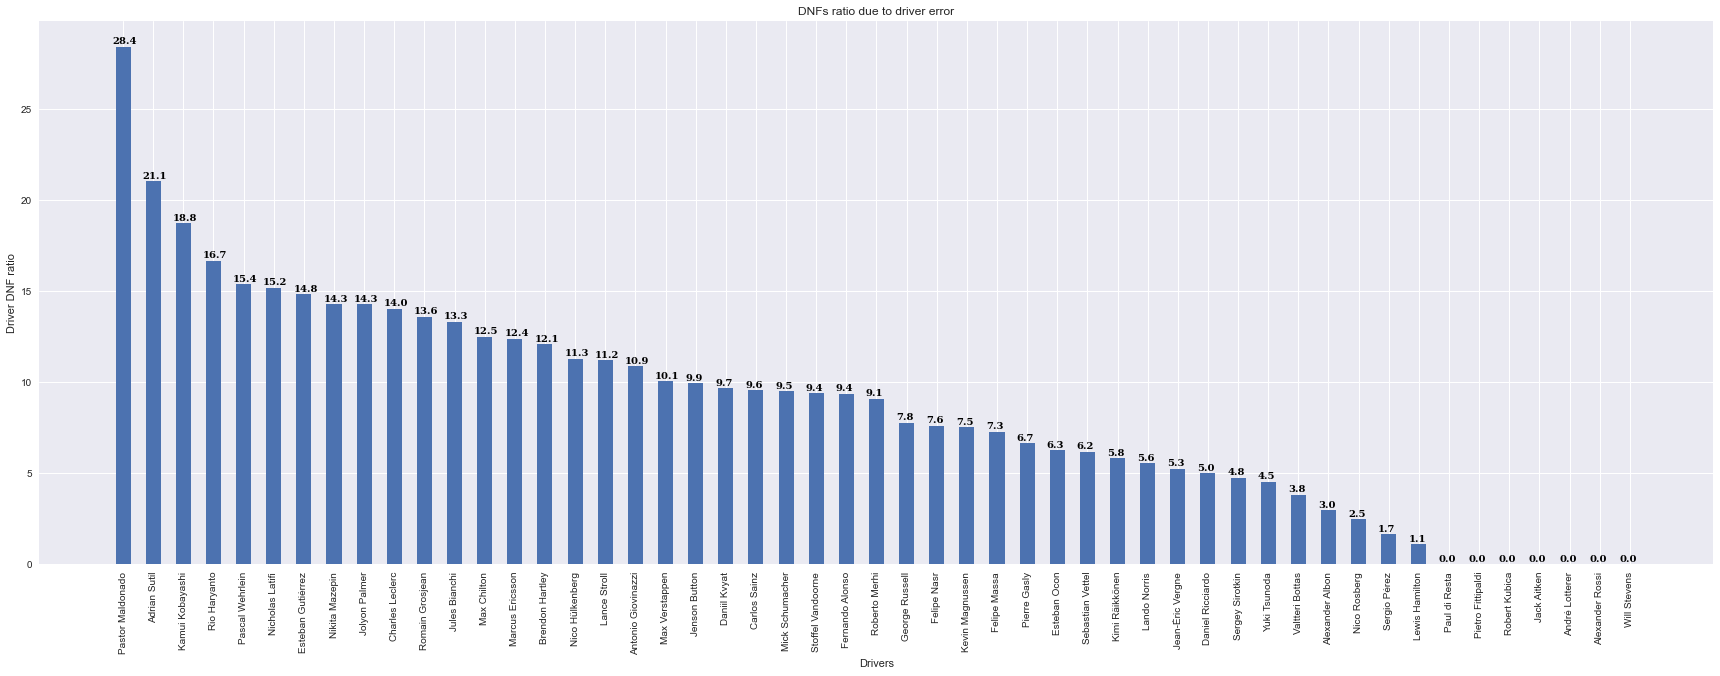

In [372]:
dnf_by_driver = data.groupby('driver').sum()['driver_dnf']
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver*100/driver_race_entered).sort_values(ascending=False)
plt.figure(figsize=(30,10))
bars = plt.bar(x=driver_dnf_ratio.index,height=driver_dnf_ratio,align='center',width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('Driver DNF ratio')
plt.title('DNFs ratio due to driver error')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()-0.1,yval+0.15,f'{round(yval,1)}',fontdict=font)
plt.show()

In [373]:
dnf_by_driver = data.groupby('driver').sum()['driver_dnf']
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
driver_confidence = 1-driver_dnf_ratio
driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))





dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']
constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
constructor_relaiblity = 1-constructor_dnf_ratio
constructor_relaiblity_dict = dict(zip(constructor_relaiblity.index,constructor_relaiblity))

In [374]:
data['driver_confidence'] = data['driver'].apply(lambda x:driver_confidence_dict[x])
data['constructor_relaiblity'] = data['constructor'].apply(lambda x:constructor_relaiblity_dict[x])
#removing retired drivers and constructors
active_constructors = ['Renault', 'Williams', 'McLaren', 'Ferrari', 'Mercedes',
                       'AlphaTauri', 'Racing Point', 'Alfa Romeo', 'Red Bull',
                       'Haas F1 Team']
active_drivers = ['Daniel Ricciardo', 'Kevin Magnussen', 'Carlos Sainz',
                  'Valtteri Bottas', 'Lance Stroll', 'George Russell',
                  'Lando Norris', 'Sebastian Vettel', 'Kimi Räikkönen',
                  'Charles Leclerc', 'Lewis Hamilton', 'Daniil Kvyat',
                  'Max Verstappen', 'Pierre Gasly', 'Alexander Albon',
                  'Sergio Pérez', 'Esteban Ocon', 'Antonio Giovinazzi',
                  'Romain Grosjean','Nicholas Latifi']
data['active_driver'] = data['driver'].apply(lambda x: int(x in active_drivers))
data['active_constructor'] = data['constructor'].apply(lambda x: int(x in active_constructors))
data['weather'] = data['weather'].apply(lambda x: int(x in weather))

In [375]:
cleaned_data = data[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_relaiblity','active_driver','active_constructor','dob','points']]
cleaned_data = cleaned_data[(cleaned_data['active_driver']==1)&(cleaned_data['active_constructor']==1)]
cleaned_data.to_csv('cleaned_data.csv',index=False)
cleaned_data.head(3)


,GP_name,quali_pos,constructor,driver,position,driver_confidence,constructor_relaiblity,active_driver,active_constructor,dob,points
3655,Albert Park Grand Prix Circuit,20,Williams,Lance Stroll,19,0.8879,0.394726,1,1,1998-10-29,0.0
3656,Albert Park Grand Prix Circuit,20,Williams,Lance Stroll,19,0.8879,0.394726,1,1,1998-10-29,0.0
3657,Albert Park Grand Prix Circuit,20,Williams,Lance Stroll,19,0.8879,0.394726,1,1,1998-10-29,0.0


In [376]:
driver_standingsDF

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33389,70776,1074,840,0.0,16,-,0
33390,70777,1074,852,0.0,17,-,0
33391,70778,1074,830,0.0,18,-,0
33392,70779,1074,20,0.0,19,-,0


In [377]:
pit_stopsDF

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8823,1073,840,2,52,18:22:55,22.661,22661
8824,1073,815,3,53,18:23:09,21.385,21385
8825,1073,854,2,52,18:23:42,22.070,22070
8826,1073,852,2,53,18:24:01,21.909,21909


In [378]:
constructorDF

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [379]:
df_pitstops_gb = pit_stopsDF.groupby(['driverId', 'raceId']).count().reset_index()
#df_pitstops_gb

In [380]:
circuitsDF

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
76,77,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.54330,39.17280,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


In [381]:
# Merge all three datasets and filter out races before 2010 
m1=pd.merge(resultsDF,driversDF,on='driverId')
m2=pd.merge(m1,racesDF,on='raceId')

result_v2=m2[m2.year>2009]

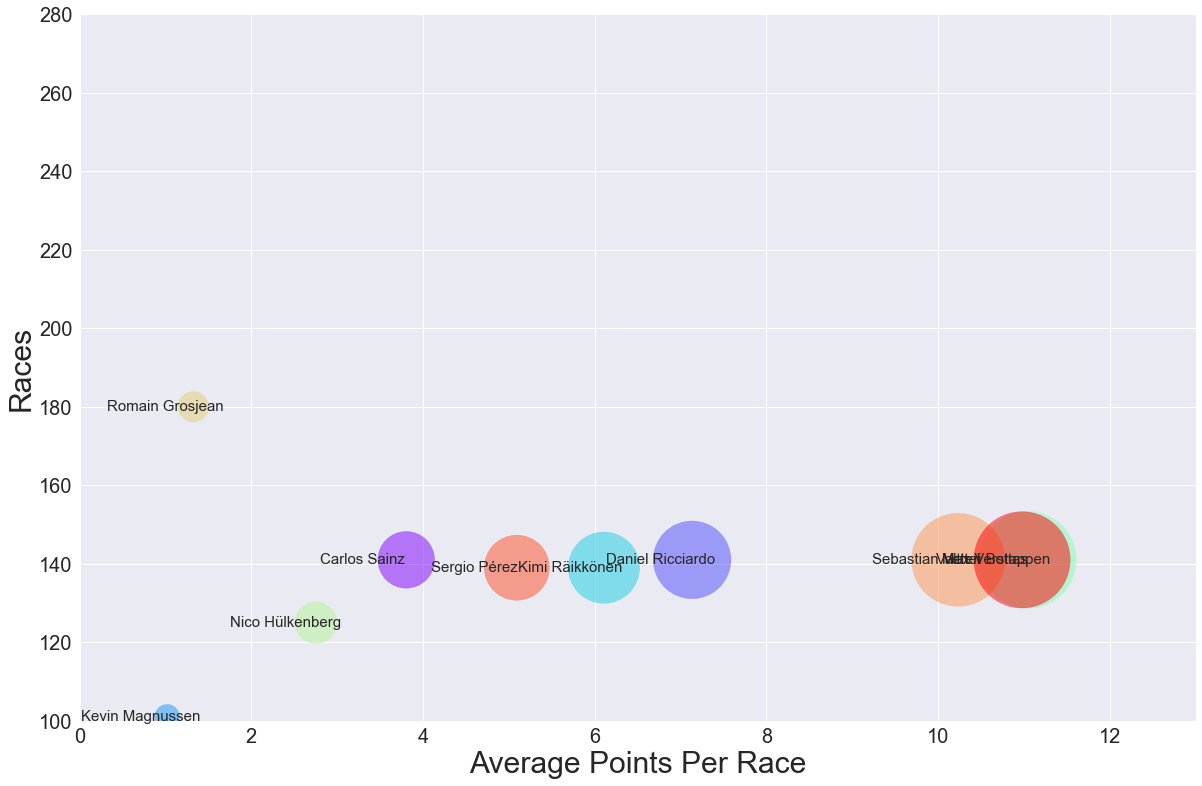

In [382]:
#added this variable to see years from 2014 - 2021
results_2014_2021 = m2[m2.year>2014]



# Create driver name field from forename and surname
results_2014_2021["driver"] = results_2014_2021["forename"] + " " + results_2014_2021["surname"]

# Aggregate total points and average points per race
avg_pts   = results_2014_2021[['driver','points']].groupby("driver").mean()
total_pts = results_2014_2021[['driver','points']].groupby("driver").sum()

# Count number of races for each driver and filter out drivers with less than 100 races
n=results_2014_2021[['driver','raceId']].groupby("driver").count()
num_races=n[n.raceId>100]

# Merge the above summary tables and reset index to create column for driver name
d =pd.merge(avg_pts,total_pts,on='driver')
md=pd.merge(d,num_races,on='driver')
md = md.reset_index()
md.iloc[7,3]=180 #data correction
md.iloc[6,3]=125 #data correction

# Create bubble chart with size of the bubble showing total points scored in the decade

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rc('figure', titlesize=30)   # fontsize of the figure title

plt.figure(figsize=(20,13))
plt.scatter(md.points_x,md.raceId,s=md.points_y*6,alpha=0.5,cmap='rainbow',c=md.index.to_series())
plt.xlim(0,13)
plt.ylim(100,280)

plt.xlabel("Average Points Per Race")
plt.ylabel("Races")

for x,y,z in zip(md.points_x,md.raceId,md.driver):
    plt.annotate(z,xy=(x-1,y-1))







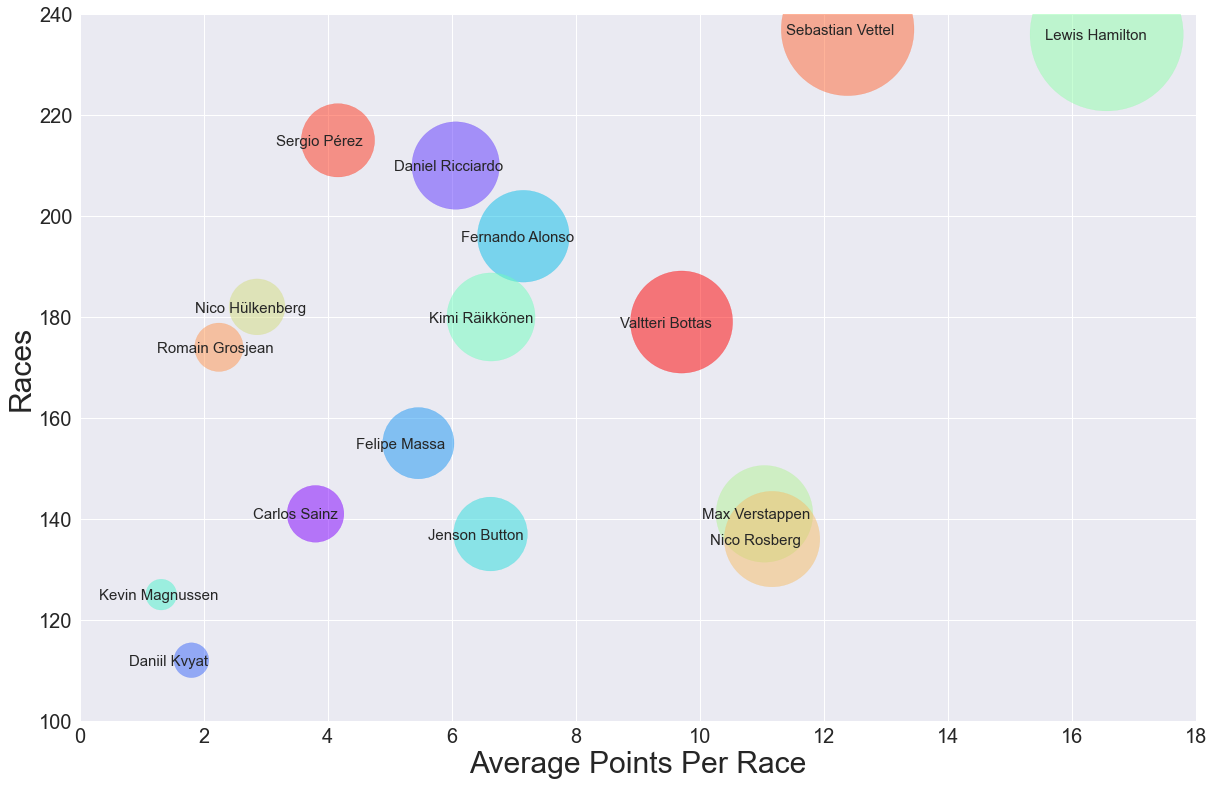

In [383]:
# Merge all three datasets and filter out races before 2010 
m1=pd.merge(resultsDF,driversDF,on='driverId')
m2=pd.merge(m1,racesDF,on='raceId')

result_v2=m2[m2.year>2009]



result_v2["driver"] = result_v2["forename"] + " " + result_v2["surname"]

# Aggregate total points and average points per race
avg_pts   = result_v2[['driver','points']].groupby("driver").mean()
total_pts = result_v2[['driver','points']].groupby("driver").sum()


# Count number of races for each driver and filter out drivers with less than 100 races
n=result_v2[['driver','raceId']].groupby("driver").count()
num_races=n[n.raceId>100]


# Merge the above summary tables and reset index to create column for driver name
d =pd.merge(avg_pts,total_pts,on='driver')
md=pd.merge(d,num_races,on='driver')
md = md.reset_index()
md.iloc[7,3]=180 #data correction
md.iloc[6,3]=125 #data correction



# Create bubble chart with size of the bubble showing total points scored in the decade

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rc('figure', titlesize=30)   # fontsize of the figure title

plt.figure(figsize=(20,13))
plt.scatter(md.points_x,md.raceId,s=md.points_y*6,alpha=0.5,cmap='rainbow',c=md.index.to_series())
plt.xlim(0,18)
plt.ylim(100,240)

plt.xlabel("Average Points Per Race")
plt.ylabel("Races")

for x,y,z in zip(md.points_x,md.raceId,md.driver):
    plt.annotate(z,xy=(x-1,y-1))

In [384]:
#concatonate pit stops to other dataframe
m3=pd.merge(results_2014_2021,df_pitstops_gb,on='raceId')
results_2014_2021_pitstops=m3[m3.year>2014]
len(results_2014_2021_pitstops)

results_2014_2021_pitstops=m3[m3.year>2014]
print(len(results_2014_2021_pitstops))
results_2014_2021_pitstops

53538


,resultId,raceId,driverId_x,constructorId,number_x,grid,position,positionText,positionOrder,points,...,date,time_y,url_y,driver,driverId_y,stop,lap,time,duration,milliseconds_y
0,22538,926,1,131,44,1,1,1,1,25.0,...,2015-03-15,05:00:00,http://en.wikipedia.org/wiki/2015_Australian_G...,Lewis Hamilton,1,1,1,1,1,1
1,22538,926,1,131,44,1,1,1,1,25.0,...,2015-03-15,05:00:00,http://en.wikipedia.org/wiki/2015_Australian_G...,Lewis Hamilton,3,1,1,1,1,1
2,22538,926,1,131,44,1,1,1,1,25.0,...,2015-03-15,05:00:00,http://en.wikipedia.org/wiki/2015_Australian_G...,Lewis Hamilton,8,2,2,2,2,2
3,22538,926,1,131,44,1,1,1,1,25.0,...,2015-03-15,05:00:00,http://en.wikipedia.org/wiki/2015_Australian_G...,Lewis Hamilton,13,1,1,1,1,1
4,22538,926,1,131,44,1,1,1,1,25.0,...,2015-03-15,05:00:00,http://en.wikipedia.org/wiki/2015_Australian_G...,Lewis Hamilton,18,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53533,24942,1046,850,210,51,20,17,17,17,0.0,...,2020-12-06,17:10:00,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...,Pietro Fittipaldi,847,4,4,4,4,4
53534,24942,1046,850,210,51,20,17,17,17,0.0,...,2020-12-06,17:10:00,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...,Pietro Fittipaldi,848,2,2,2,2,2
53535,24942,1046,850,210,51,20,17,17,17,0.0,...,2020-12-06,17:10:00,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...,Pietro Fittipaldi,849,1,1,1,1,1
53536,24942,1046,850,210,51,20,17,17,17,0.0,...,2020-12-06,17:10:00,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...,Pietro Fittipaldi,850,3,3,3,3,3


In [385]:
#result_v2.filter(items=['name'])
# Count number of races for each driver and filter out drivers with less than 100 races
n=result_v2[['name','raceId']].groupby("name").count()
num_races=n[n.raceId>100]

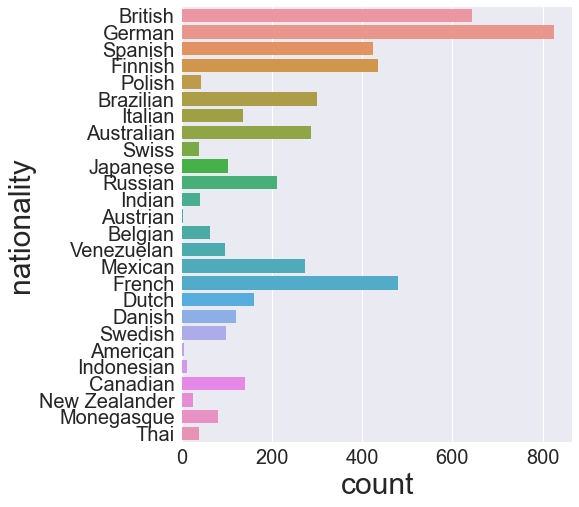

In [386]:
f, ax = plt.subplots(figsize=(7, 8))

sns.countplot(y="nationality",ax=ax, data=result_v2)
plt.show()

In [387]:
# Drivers name concat
concat_driver_name = lambda x: f"{x.forename} {x.surname}" 

driversDF['driver'] = driversDF.apply(concat_driver_name, axis=1)

In [388]:
# Preparing F1 history victories dataset
results_copy = results.set_index('raceId').copy()
races_copy = races.set_index('raceId').copy()

results_copy = results_copy.query("position == '1'")
results_copy['position'] = 1 # casting position 1 to int 

results_cols = ['driverId', 'position']
races_cols = ['date']
drivers_cols = ['driver', 'driverId']

results_copy = results_copy[results_cols]
races_copy = races_copy[races_cols]
drivers_copy = driversDF[drivers_cols]

f1_victories = results_copy.join(races_copy)
f1_victories = f1_victories.merge(drivers_copy, on='driverId', how='left')

# Victories cumulative sum
f1_victories = f1_victories.sort_values(by='date')

f1_victories['victories'] = f1_victories.groupby(['driverId']).cumsum()   

# Getting the top five f1 biggest winners drivers id
f1_biggest_winners = f1_victories.groupby('driverId').victories.nlargest(1).sort_values(ascending=False).head(5)
f1_biggest_winners_ids = [driver for driver, race in f1_biggest_winners.index]

# Dataset ready
f1_victories_biggest_winners = f1_victories.query(f"driverId == {f1_biggest_winners_ids}")

In [389]:
# Prepare dataset to plot

cols = ['date', 'driver', 'victories']
winner_drivers = f1_victories_biggest_winners.driver.unique()

colors = {
    'Alain Prost': '#d80005', 
    'Ayrton Senna': '#ffffff', 
    'Michael Schumacher': '#f71120',
    'Sebastian Vettel': '#10428e',
    'Lewis Hamilton': '#e6e6e6'
}

winners_history = pd.DataFrame()

# Including other drivers races date (like a cross join matrix, 
# but cosidering column "victories" in a shift operation) 
for driver in winner_drivers:
    # Current driver victories
    driver_history = f1_victories_biggest_winners.query(f"driver == '{driver}'")[cols]
    
    # Other drivers list
    other_drivers = winner_drivers[winner_drivers != driver]
    other_drivers = list(other_drivers)
    
    # Other drivers victories
    other_driver_history = f1_victories_biggest_winners.query(f"driver == {other_drivers}")[cols]
    
    # Renaming other drivers victories to current driver
    other_driver_history['driver'] = driver
    
    # This isn't current driver victory, so receive zero to "shift" operation
    other_driver_history['victories'] = 0    
    
    driver_history = pd.concat([driver_history, other_driver_history])

    driver_history['color'] = colors[driver]
    
    # Sorting by date to correct "shift" operation
    driver_history.sort_values(by='date', inplace=True)
    
    # Reset index to get the last row (index-1) when necessary
    driver_history.reset_index(inplace=True)
    
    # Iterating each row for remain current driver victory when 
    # race date isn't the current driver victory
    for index, row in driver_history.iterrows():
        if not row['victories'] and index-1 > 0:
            driver_history.loc[index, 'victories'] = driver_history.loc[index-1, 'victories']
        
    # Plot dataset ready
    winners_history = pd.concat([winners_history, driver_history]) 

In [390]:
# Plots the F1 race wons animated chart 
fig = go.Figure()

fig = px.bar(
    winners_history, 
    x='victories', 
    y='driver',
    color='driver',
    color_discrete_sequence=winners_history.color.unique(),
    orientation='h',
    animation_frame="date",
    animation_group="driver",
)

# Bar border line color
fig.update_traces(dict(marker_line_width=1, marker_line_color="black"))

# X axis range
fig.update_layout(xaxis=dict(range=[0, 100]))

# Setting title
fig.update_layout(title_text="Race wins in F1 history between the top 5 winners drivers")

# Animation: Buttons labels and animation duration speed
fig.update_layout(
    updatemenus = [
        {
            "buttons": [
                # Play
                {
                    "args": [
                        None, 
                        {
                            "frame": {
                                "duration": 100, 
                                 "redraw": False
                            }, 
                            "fromcurrent": True,
                            "transition": {
                                "duration": 100, 
                                "easing": "linear"
                            }
                        }
                    ],
                    "label": "Play",
                    "method": "animate"
                },
                # Pause
                {
                    "args": [
                        [None], 
                        {
                            "frame": {
                                "duration": 0, 
                                "redraw": False
                            },
                            "mode": "immediate",
                            "transition": {
                                "duration": 0
                            }
                        }
                    ],
                    "label": "Pause",
                    "method": "animate"
                }
            ]
        }
    ]
)

#fig.show()


In [391]:
# Dict for map drivers by id
winner_drivers_ids = f1_victories_biggest_winners[['driverId', 'driver']].drop_duplicates()
winner_drivers_map = {}

for _, row in winner_drivers_ids.iterrows():
    winner_drivers_map[row['driverId']] = row['driver']   

In [392]:
# Pole positions dataset
f1_biggest_winners_poles = resultsDF.query(f"driverId == {f1_biggest_winners_ids} & grid == 1")[['driverId', 'grid']]

# Driver name mapping
f1_biggest_winners_poles['driver'] = f1_biggest_winners_poles.driverId.map(winner_drivers_map)
f1_biggest_winners_poles['color'] = f1_biggest_winners_poles.driver.map(colors)

# Sum cumulative poles
f1_biggest_winners_poles['total_poles'] = f1_biggest_winners_poles.groupby(['driverId']).cumsum()   

# Total pole positions by winner drivers
f1_biggest_winners_total_poles = f1_biggest_winners_poles.groupby('driver').total_poles.nlargest(1).sort_values(ascending=False).head(5)
f1_biggest_winners_total_poles = pd.DataFrame(f1_biggest_winners_total_poles).reset_index()

f1_biggest_winners_total_poles['color'] = f1_biggest_winners_total_poles.driver.map(colors)

In [393]:
# Plot pole positions
fig = px.bar(
    f1_biggest_winners_total_poles, 
    x='driver', 
    y='total_poles',
    color='driver',
    color_discrete_sequence=f1_biggest_winners_total_poles.color
)

# Bar border line color
fig.update_traces(dict(marker_line_width=1, marker_line_color="black"))

# Setting title
fig.update_layout(title_text="Pole positions between the top 5 race winners drivers")

fig.show()

In [394]:
#concatonate pit stops to other dataframe
m3=pd.merge(result_v2,df_pitstops_gb,on='raceId')
m3=m3[m3.year>2020]
print(len(m3))
m3.head()

print(m3.columns)

7922
Index(['resultId', 'raceId', 'driverId_x', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds_x', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality', 'url_x', 'year', 'round',
       'circuitId', 'name', 'date', 'time_y', 'url_y', 'driver', 'driverId_y',
       'stop', 'lap', 'time', 'duration', 'milliseconds_y'],
      dtype='object')


In [395]:
#drop duplicate columns

m3 = m3.drop(columns=['url_x','url_y','driverId_x','milliseconds_y','time_x'])


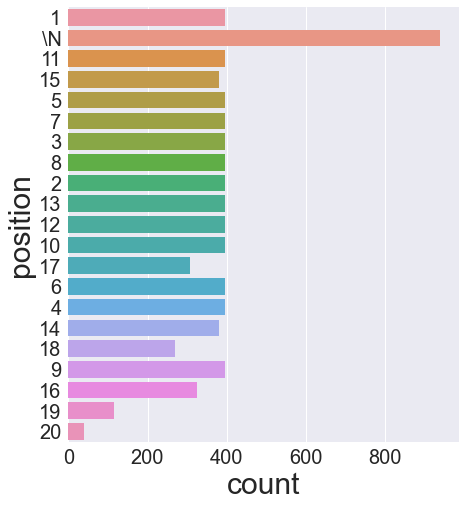

In [396]:
f, ax = plt.subplots(figsize=(7, 8))

sns.countplot(y="position",ax=ax, data=m3)
plt.show()

In [397]:
df_circuits = pd.read_csv(r'circuits.csv')
df_circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
76,77,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.54330,39.17280,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


In [398]:
laptimes = pd.read_csv(r'lap_times.csv')

In [399]:
df_combined = pd.merge(laptimes, racesDF, on='raceId', how='left')

df_combined = df_combined[['raceId', 'driverId', 'time_x', 'milliseconds',
       'year', 'round', 'circuitId', 'name', 'date']]
df_combined.rename(columns={'time_x':'lap_time', 'name':'circuit_name'}, inplace=True)
df_combined = pd.merge(df_combined, driversDF, on='driverId', how='left')
df_combined = pd.merge(df_combined, df_circuits, on='circuitId', how='left')

df_combined = df_combined[['raceId', 'driverId', 'lap_time', 'milliseconds', 'year', 'round',
       'circuitId', 'circuit_name', 'date', 'driverRef', 'number', 'code',
       'forename', 'surname', 'dob', 'nationality', 'circuitRef', 'location', 'country']]
df_combined.head(3)

#considering data points from 2014
df_combined = df_combined[df_combined['year']>=2014]
df_combined.sort_values(by=['year'])

,raceId,driverId,lap_time,milliseconds,year,round,circuitId,circuit_name,date,driverRef,number,code,forename,surname,dob,nationality,circuitRef,location,country
72130,900,3,1:42.038,102038,2014,1,1,Australian Grand Prix,2014-03-16,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,albert_park,Melbourne,Australia
86148,912,20,1:29.985,89985,2014,13,14,Italian Grand Prix,2014-09-07,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,monza,Monza,Italy
86147,912,20,1:29.624,89624,2014,13,14,Italian Grand Prix,2014-09-07,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,monza,Monza,Italy
86146,912,20,1:29.648,89648,2014,13,14,Italian Grand Prix,2014-09-07,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,monza,Monza,Italy
86145,912,20,1:29.596,89596,2014,13,14,Italian Grand Prix,2014-09-07,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,monza,Monza,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498795,1059,847,1:38.578,98578,2021,7,34,French Grand Prix,2021-06-20,russell,63,RUS,George,Russell,1998-02-15,British,ricard,Le Castellet,France
498794,1059,847,1:39.415,99415,2021,7,34,French Grand Prix,2021-06-20,russell,63,RUS,George,Russell,1998-02-15,British,ricard,Le Castellet,France
498793,1059,847,1:40.501,100501,2021,7,34,French Grand Prix,2021-06-20,russell,63,RUS,George,Russell,1998-02-15,British,ricard,Le Castellet,France
498802,1059,852,1:40.996,100996,2021,7,34,French Grand Prix,2021-06-20,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,ricard,Le Castellet,France


In [400]:
data = pd.merge(df_combined.groupby(['circuit_name','date']).lap_time.min().to_frame().reset_index(), df_combined[['circuit_name','date','lap_time', 'driverRef','code']], on=['circuit_name','date','lap_time'], how='left')
data = data.sort_values(by='date', ascending = False)
print(data.head())
print(len(data))

                 circuit_name        date   lap_time       driverRef code
8        Abu Dhabi Grand Prix  2021-12-12   1:26.103  max_verstappen  VER
132  Saudi Arabian Grand Prix  2021-12-05  19:45.303          stroll  STR
122          Qatar Grand Prix  2021-11-21   1:23.196  max_verstappen  VER
149      São Paulo Grand Prix  2021-11-14   1:11.010           perez  PER
112    Mexico City Grand Prix  2021-11-07   1:17.774          bottas  BOT
160


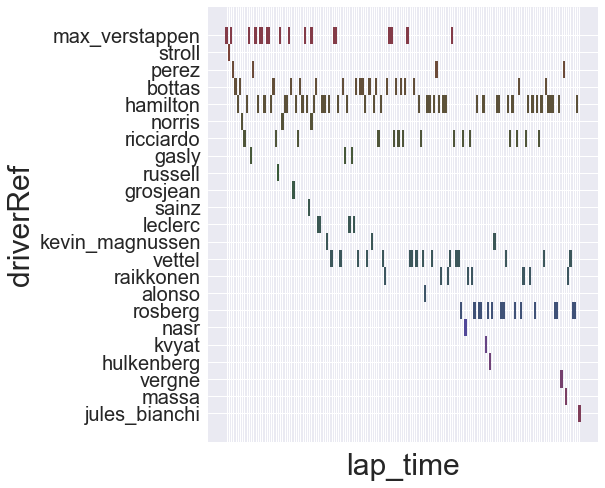

In [401]:
#data=data[data.year>2020]
f, ax = plt.subplots(figsize=(7, 8))

#sns.catplot(x="lap_time", y="driverRef", jitter=False, data=data)
#sns.histplot(data=data1, x="lap_time", hue="driverRef")
#plt.show

laptime21 = sns.histplot(
    data, x="lap_time", y="driverRef", hue="driverRef", legend=False
)

laptime21.set_xticklabels(laptime21.get_xticklabels(), rotation=45)

None

In [402]:
df_circuits.shape

(79, 9)

In [403]:
status = pd.read_csv(r'status.csv')
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
132,135,Brake duct
133,136,Seat
134,137,Damage
135,138,Debris


In [404]:

status = pd.merge(m3, status, on='statusId', how='left')
status.head()

,resultId,raceId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,...,name,date,time_y,driver,driverId_y,stop,lap,time,duration,status
0,24966,1052,131,44,2,1,1,1,25.0,56,...,Bahrain Grand Prix,2021-03-28,15:00:00,Lewis Hamilton,1,2,2,2,2,Finished
1,24966,1052,131,44,2,1,1,1,25.0,56,...,Bahrain Grand Prix,2021-03-28,15:00:00,Lewis Hamilton,4,2,2,2,2,Finished
2,24966,1052,131,44,2,1,1,1,25.0,56,...,Bahrain Grand Prix,2021-03-28,15:00:00,Lewis Hamilton,8,2,2,2,2,Finished
3,24966,1052,131,44,2,1,1,1,25.0,56,...,Bahrain Grand Prix,2021-03-28,15:00:00,Lewis Hamilton,20,1,1,1,1,Finished
4,24966,1052,131,44,2,1,1,1,25.0,56,...,Bahrain Grand Prix,2021-03-28,15:00:00,Lewis Hamilton,815,3,3,3,3,Finished


In [405]:

cleaned_data = pd.read_csv(r'/Users/cameronstevens/Documents/lighthouse-course/F1_worldchampionship_1950-2021/cleaned_data.csv')
cleaned_data.columns

Index(['GP_name', 'quali_pos', 'constructor', 'driver', 'position',
       'driver_confidence', 'constructor_relaiblity', 'active_driver',
       'active_constructor', 'dob', 'points'],
      dtype='object')

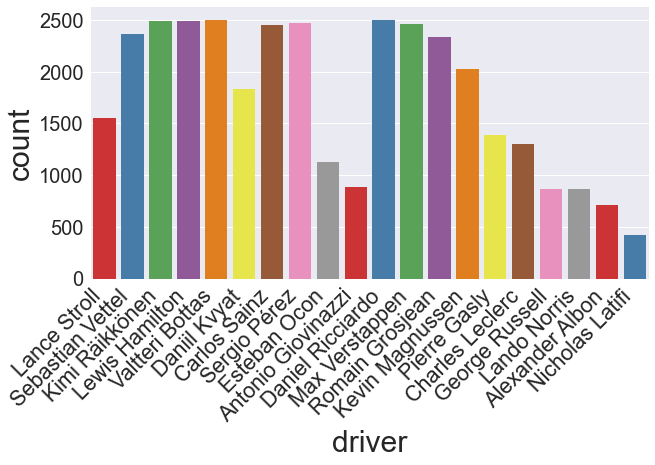

In [406]:



plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=cleaned_data,
    x='driver',
    palette='Set1'
)

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

)

None

In [407]:

#plt.figure(figsize=(10,5))
#chart = sns.countplot(
  #  data=data[data['Year'] == 1980],
 #   x='Sport',
 #   palette='Set1'

In [408]:
df_seasons = pd.read_csv(r'seasons.csv')
df_seasons

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...
...,...,...
68,2018,https://en.wikipedia.org/wiki/2018_Formula_One...
69,2019,https://en.wikipedia.org/wiki/2019_Formula_One...
70,2020,https://en.wikipedia.org/wiki/2020_Formula_One...
71,2021,https://en.wikipedia.org/wiki/2021_Formula_One...


In [409]:
#joining resulDF with driversDF by column driverID,using inner join
dfresul = pd.merge(resultsDF,driversDF,on='driverId')
#joining racesDF with dfresul by column raceID,using inner join
dfresulcons = pd.merge(dfresul,racesDF,on='raceId')
#joining constructorDF with dfresulcons by column constructorID,using inner join
dfresulrac = pd.merge(dfresulcons,constructorDF,on='constructorId')
#join circuits

In [410]:
dfresulrac.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,round,circuitId,name_x,date,time_y,url_y,constructorRef,name_y,nationality_y,url
0,1,18,1,1,22,1,1,1,1,10.0,...,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,5,18,5,1,23,3,5,5,5,4.0,...,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,27,19,1,1,22,9,5,5,5,4.0,...,2,2,Malaysian Grand Prix,2008-03-23,07:00:00,http://en.wikipedia.org/wiki/2008_Malaysian_Gr...,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,25,19,5,1,23,8,3,3,3,6.0,...,2,2,Malaysian Grand Prix,2008-03-23,07:00:00,http://en.wikipedia.org/wiki/2008_Malaysian_Gr...,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,57,20,1,1,22,3,13,13,13,0.0,...,3,3,Bahrain Grand Prix,2008-04-06,11:30:00,http://en.wikipedia.org/wiki/2008_Bahrain_Gran...,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [411]:
#drop duplicate columns

dfresulrac = dfresulrac.drop(columns=['url_x','url_y','name_y','nationality_y','url','time_y'])
df_base = dfresulrac[dfresulrac.position == '\\N'].index
df_base

Int64Index([    7,    12,    31,    33,    65,    66,    70,    71,    73,
               79,
            ...
            25379, 25381, 25382, 25383, 25384, 25389, 25391, 25394, 25397,
            25398],
           dtype='int64', length=10786)

In [412]:
new_db = dfresulrac.drop(df_base,axis=0)
new_db['score'] = new_db['position'].apply(lambda x: 1 if x in range(1,11) else 0)
new_db.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,dob,nationality_x,driver,year,round,circuitId,name_x,date,constructorRef,score
0,1,18,1,1,22,1,1,1,1,10.0,...,1985-01-07,British,Lewis Hamilton,2008,1,1,Australian Grand Prix,2008-03-16,mclaren,0
1,5,18,5,1,23,3,5,5,5,4.0,...,1981-10-19,Finnish,Heikki Kovalainen,2008,1,1,Australian Grand Prix,2008-03-16,mclaren,0
2,27,19,1,1,22,9,5,5,5,4.0,...,1985-01-07,British,Lewis Hamilton,2008,2,2,Malaysian Grand Prix,2008-03-23,mclaren,0
3,25,19,5,1,23,8,3,3,3,6.0,...,1981-10-19,Finnish,Heikki Kovalainen,2008,2,2,Malaysian Grand Prix,2008-03-23,mclaren,0
4,57,20,1,1,22,3,13,13,13,0.0,...,1985-01-07,British,Lewis Hamilton,2008,3,3,Bahrain Grand Prix,2008-04-06,mclaren,0


In [413]:
new_db.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality_x', 'driver', 'year',
       'round', 'circuitId', 'name_x', 'date', 'constructorRef', 'score'],
      dtype='object')

In [414]:
status.drop(['resultId', 'raceId', 'constructorId', 'number_x', 'grid',
       'positionText', 'positionOrder', 'laps', 'milliseconds_x',
       'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed',
       'driverRef', 'number_y', 'code', 'forename', 'surname', 'dob',
       'nationality', 'year', 'round', 'circuitId', 'name', 'date',
       'driver', 'driverId_y'], axis=1)

,position,points,statusId,time_y,stop,lap,time,duration,status
0,1,25.0,1,15:00:00,2,2,2,2,Finished
1,1,25.0,1,15:00:00,2,2,2,2,Finished
2,1,25.0,1,15:00:00,2,2,2,2,Finished
3,1,25.0,1,15:00:00,1,1,1,1,Finished
4,1,25.0,1,15:00:00,3,3,3,3,Finished
...,...,...,...,...,...,...,...,...,...
7917,14,0.0,11,13:00:00,2,2,2,2,+1 Lap
7918,14,0.0,11,13:00:00,2,2,2,2,+1 Lap
7919,14,0.0,11,13:00:00,1,1,1,1,+1 Lap
7920,14,0.0,11,13:00:00,2,2,2,2,+1 Lap


In [415]:
#status = pd.merge(new_db, status, on='statusId', how='left')
#status.head(2)

In [416]:
status.columns

Index(['resultId', 'raceId', 'constructorId', 'number_x', 'grid', 'position',
       'positionText', 'positionOrder', 'points', 'laps', 'milliseconds_x',
       'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId',
       'driverRef', 'number_y', 'code', 'forename', 'surname', 'dob',
       'nationality', 'year', 'round', 'circuitId', 'name', 'date', 'time_y',
       'driver', 'driverId_y', 'stop', 'lap', 'time', 'duration', 'status'],
      dtype='object')

In [2]:
#weather = pd.read_csv(r'Formula1/CSV/weather.csv')


weather = pd.read_csv(r'/Users/cameronstevens/Documents/lighthouse-course/F1_worldchampionship_1950-2021/weatherf1.csv')
weather = weather.drop(['Unnamed: 0', 'url','circuitId','lat','long', 'round', 'country','date'], axis=1)

#shows weather dataframe
#weather

main_df = pd.read_csv(r'/Users/cameronstevens/Documents/lighthouse-course/F1_worldchampionship_1950-2021/main_df2021.csv')
print(main_df.columns)




NameError: name 'pd' is not defined

In [418]:
split_time = main_df[['season','filled_splits']]
split_time

,season,filled_splits
0,2014,0.000000
1,2014,0.017313
2,2014,0.024534
3,2014,0.035992
4,2014,0.047199
...,...,...
3054,2021,0.067527
3055,2021,0.067527
3056,2021,0.067527
3057,2021,0.067527


In [419]:
print(main_df.isnull().sum())
print(len(main_df))
print(main_df.columns)

Unnamed: 0         0
season             0
round              0
race_name          0
name               0
constructor        0
grid               0
qual_position      0
q_best             0
q_worst            0
q_mean             0
ageDuringRace      0
circuitId          0
locality           0
country            0
type               0
direction          0
length             0
weather            0
finish_position    0
points             0
filled_splits      0
dtype: int64
3059
Index(['Unnamed: 0', 'season', 'round', 'race_name', 'name', 'constructor',
       'grid', 'qual_position', 'q_best', 'q_worst', 'q_mean', 'ageDuringRace',
       'circuitId', 'locality', 'country', 'type', 'direction', 'length',
       'weather', 'finish_position', 'points', 'filled_splits'],
      dtype='object')


In [420]:

#rename the columns
main_df.rename(columns={'name':'GP_name','finish_position':'position','grid':'quali_pos'},inplace=True)
#main_df['driver'] = main_df['forename']+' '+main_df['surname']
#main_df['date'] = pd.to_datetime(main_df['date'])
#main_df['ageDuringRace'] = pd.to_datetime(main_df['ageDuringRace'])
main_df = main_df.drop(['Unnamed: 0'], axis= 1)
main_df

,season,round,race_name,GP_name,constructor,quali_pos,qual_position,q_best,q_worst,q_mean,...,circuitId,locality,country,type,direction,length,weather,position,points,filled_splits
0,2014,2,malaysian,Lewis Hamilton,mercedes,1.0,1.0,117.202,119.431,118.558000,...,sepang,Kuala Lumpur,Malaysia,Race circuit,Clockwise,5.543,"dry , 32°c",1.0,25.0,0.000000
1,2014,2,malaysian,Nico Rosberg,mercedes,3.0,3.0,117.183,120.050,118.892667,...,sepang,Kuala Lumpur,Malaysia,Race circuit,Clockwise,5.543,"dry , 32°c",2.0,18.0,0.017313
2,2014,2,malaysian,Sebastian Vettel,red_bull,2.0,2.0,117.654,119.486,118.846333,...,sepang,Kuala Lumpur,Malaysia,Race circuit,Clockwise,5.543,"dry , 32°c",3.0,15.0,0.024534
3,2014,2,malaysian,Fernando Alonso,ferrari,4.0,4.0,118.889,121.356,120.140000,...,sepang,Kuala Lumpur,Malaysia,Race circuit,Clockwise,5.543,"dry , 32°c",4.0,12.0,0.035992
4,2014,2,malaysian,Nico Hülkenberg,racing_point,7.0,7.0,118.883,121.712,120.478000,...,sepang,Kuala Lumpur,Malaysia,Race circuit,Clockwise,5.543,"dry , 32°c",5.0,10.0,0.047199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,2021,22,abu-dhabi,Nicholas Latifi,williams,16.0,16.0,84.338,84.338,84.338000,...,yas_marina,Abu Dhabi,UAE,Race circuit,Anti-clockwise,5.281,clear,16.0,0.0,0.067527
3055,2021,22,abu-dhabi,Antonio Giovinazzi,alfa,14.0,14.0,84.118,84.251,84.184500,...,yas_marina,Abu Dhabi,UAE,Race circuit,Anti-clockwise,5.281,clear,17.0,0.0,0.067527
3056,2021,22,abu-dhabi,George Russell,williams,17.0,17.0,84.423,84.423,84.423000,...,yas_marina,Abu Dhabi,UAE,Race circuit,Anti-clockwise,5.281,clear,18.0,0.0,0.067527
3057,2021,22,abu-dhabi,Kimi Räikkönen,alfa,18.0,18.0,84.779,84.779,84.779000,...,yas_marina,Abu Dhabi,UAE,Race circuit,Anti-clockwise,5.281,clear,19.0,0.0,0.067527


In [421]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

In [1]:
main_df.columns

NameError: name 'main_df' is not defined

In [423]:
x = main_df[['qual_position','q_best', 'q_worst', 'q_mean', 'GP_name', 'constructor','position','driver_confidence','constructor_relaiblity','active_driver','active_constructor','dob' ]]



KeyError: "['driver_confidence', 'constructor_relaiblity', 'active_driver', 'active_constructor', 'dob'] not in index"

In [ ]:


sc  = preprocessing.StandardScaler()
le = LabelEncoder()
x['race_name'] = le.fit_transform(x['race_name'])
x['constructor'] = le.fit_transform(x['constructor'])
x['driver'] = le.fit_transform(x['driver'])
x['GP_name'] = le.fit_transform(x['GP_name'])
X = x.drop(['position','active_driver','active_constructor'],1)
y = x['position'].apply(lambda x: position_index(x))

KeyError: 'driver'

In [ ]:
#cross validation for diffrent models
models = [LogisticRegression(solver='lbfgs', max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results = []
results = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X,y,cv=cv,scoring='accuracy')
    mean_results.append(result.mean())
    results.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

TypeError: Singleton array array(179) cannot be considered a valid collection.

In [426]:
import joblib
import pickle


filename = '/Users/cameronstevens/Documents/lighthouse-course/F1_worldchampionship_1950-2021/f1model_XGB.pkl'
model = pickle.load(open(filename, 'rb'))


#model = joblib.load('')

XGBoostError: [18:45:30] /Users/runner/work/xgboost/xgboost/src/learner.cc:959: Check failed: header == serialisation_header_: 

  If you are loading a serialized model (like pickle in Python) generated by older
  XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version.  There's a simple script for helping
  the process. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for reference to the script, and more details about differences between saving model and
  serializing.


Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000011ca424a4 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x000000011caeddca xgboost::LearnerIO::Load(dmlc::Stream*) + 2186
  [bt] (2) 3   libxgboost.dylib                    0x000000011ca3d101 XGBoosterUnserializeFromBuffer + 145
  [bt] (3) 4   libffi.6.dylib                      0x000000010a1c0934 ffi_call_unix64 + 76
  [bt] (4) 5   ???                                 0x00007ff7b627df10 0x0 + 140701889715984

